# Simulating the relationship between internal homotropic and observed external Hill coefficients
This notebook explores how variations in the internal homotropic Hill coefficient affect the externally observed Hill coefficient. Using the parameter set that generates the blue curve in Figure 6 as a reference, an array of (a, b) parameter pairs is generated to span internal Hill values from 1 to 2. For each pair, the corresponding rate equation is calculated with the selected parameters, fitted to the Hill equation to determine the observed external Hill coefficient, and subsequently plotted.


## 01 imports and initial setup of a,b pairs

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from multiprocessing import Pool 
import sympy as sp 


In [2]:

A, a, b = sp.symbols('A a b')

A_vals = np.linspace(0, 2000, 800, dtype=np.float128) 

# Define the range for n
n_vals = np.linspace(0.95, 1.98, 200)

# Generate a values 
a_vals = np.full(200, 1)
# Calculate corresponding b values
b_vals = a_vals * (2 / n_vals - 1)**2

# Define the Hill equation
def hill_eq(A, Vmax, Kd, n):
    return (Vmax * A**n) / (Kd**n + A**n)


# Storage for maximum Hill coefficients
max_hill_parameters = []
max_hill = 1;
max_vmax = 0;
best_fit_params = [];
best_fit_data = {}
iterations_data = []
hill_coeffs = [] 
results = []


## 02 Set parameter values for testing- here parameters creating the Blue curve as an example

In [4]:

params = {
'k1': 3613540.0,
'k_1': 15037.5,
'k_2': 0.15551,
'k3': 1971.37,
'k_3': 3043660.0,
'k_4': 2.55275,
'k5': 22846.6,
'k_5': 10509.5,
'k6': 1155.3,
'k_6': 0.0727721,
'k7': 21563.8,
'B': 100,
'ET': 0.1

}




## 03 Loop through each a, b pair and fit the Hill equation, print the results

In [6]:

for a_val, b_val in zip(a_vals, b_vals):
    # Substitute the parameters a and b into the full equation for V
    params = params.copy()
    params['a'] = a
    params['b'] = b
    
    # Coefficient calculations

    P1 = params['B']*params['ET']*params['a']*params['b']**2*params['k1']**2*params['k3']**2*params['k5']*params['k6']**3*params['k_1']**3*params['k_5']**2

    P2 = params['B']**2*params['ET']*params['a']**2*params['b']*params['k1']**3*params['k3']*params['k5']**2*params['k6']**2*params['k_1']*params['k_2']*params['k_3']*params['k_5']*params['k_6'] + params['B']**2*params['ET']*params['a']*params['b']*params['k1']**2*params['k3']**2*params['k5']**2*params['k6']**2*params['k_1']**2*params['k_4']*params['k_5']*params['k_6'] + params['B']*params['ET']*params['a']*params['b']**2*params['k1']**2*params['k3']**2*params['k5']*params['k6']**2*params['k_1']**3*params['k_4']*params['k_5']**2 + params['B']*params['ET']*params['a']*params['b']**2*params['k1']**2*params['k3']**2*params['k5']*params['k6']**2*params['k_1']**3*params['k_4']*params['k_5']*params['k_6'] + params['B']*params['ET']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']**3*params['k_1']**3*params['k_2']*params['k_5']**2

    P3 = params['B']**3*params['ET']*params['a']**2*params['k1']**3*params['k3']*params['k5']**3*params['k6']*params['k_2']*params['k_3']*params['k_4']*params['k_6']**2 + params['B']**2*params['ET']*params['a']**2*params['b']*params['k1']**3*params['k3']*params['k5']**2*params['k6']*params['k_1']*params['k_2']*params['k_3']*params['k_4']*params['k_5']*params['k_6'] + params['B']**2*params['ET']*params['a']**2*params['b']*params['k1']**3*params['k3']*params['k5']**2*params['k6']*params['k_1']*params['k_2']*params['k_3']*params['k_4']*params['k_6']**2 + params['B']**2*params['ET']*params['a']*params['b']*params['k1']**2*params['k3']*params['k5']**2*params['k6']**2*params['k_1']**2*params['k_2']*params['k_3']*params['k_5']*params['k_6'] + params['B']**2*params['ET']*params['a']*params['b']*params['k1']**2*params['k3']*params['k5']**2*params['k6']**2*params['k_1']**2*params['k_2']*params['k_4']*params['k_5']*params['k_6'] + params['B']*params['ET']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']**2*params['k_1']**3*params['k_2']*params['k_3']*params['k_5']**2 + params['B']*params['ET']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']**2*params['k_1']**3*params['k_2']*params['k_3']*params['k_5']*params['k_6'] + params['B']*params['ET']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']**2*params['k_1']**3*params['k_2']*params['k_4']*params['k_5']**2 + params['B']*params['ET']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']**2*params['k_1']**3*params['k_2']*params['k_4']*params['k_5']*params['k_6']

    P4 = params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']**2*params['k5']*params['k6']**3*params['k_1']**3*params['k_5']**2 + params['a']*params['b']**2*params['k1']**2*params['k3']**2*params['k6']**3*params['k7']*params['k_1']**3*params['k_5']**2 + params['a']*params['b']**2*params['k1']**2*params['k3']**2*params['k6']**3*params['k_1']**3*params['k_5']**3

    P5 = params['B']**2*params['a']**2*params['b']*params['k1']**3*params['k3']*params['k5']**2*params['k6']**2*params['k_1']*params['k_2']*params['k_3']*params['k_5']*params['k_6'] + params['B']**2*params['a']*params['b']*params['k1']**2*params['k3']**2*params['k5']**2*params['k6']**2*params['k_1']**2*params['k_4']*params['k_5']*params['k_6'] + params['B']*params['a']**2*params['b']*params['k1']**3*params['k3']*params['k5']*params['k6']**2*params['k_1']*params['k_2']*params['k_3']*params['k_5']**2*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']**2*params['k5']*params['k6']**2*params['k_1']**3*params['k_4']*params['k_5']**2 + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']**2*params['k5']*params['k6']**2*params['k_1']**3*params['k_4']*params['k_5']*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']**2*params['k5']*params['k6']**2*params['k_1']**3*params['k_5']**2*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']**3*params['k_1']**3*params['k_2']*params['k_5']**2 + params['B']*params['a']*params['b']**2*params['k1']*params['k3']**2*params['k5']*params['k6']**3*params['k7']*params['k_1']**3*params['k_5']**2 + params['B']*params['a']*params['b']*params['k1']**2*params['k3']**2*params['k5']*params['k6']**2*params['k_1']**2*params['k_4']*params['k_5']**2*params['k_6'] + params['B']*params['b']**2*params['k1']*params['k3']**2*params['k5']*params['k6']**3*params['k7']*params['k_1']**3*params['k_5']**2 + params['a']*params['b']**2*params['k1']**2*params['k3']**2*params['k6']**2*params['k7']*params['k_1']**3*params['k_4']*params['k_5']**2 + params['a']*params['b']**2*params['k1']**2*params['k3']**2*params['k6']**2*params['k_1']**3*params['k_4']*params['k_5']**3 + params['a']*params['b']**2*params['k1']**2*params['k3']**2*params['k6']**2*params['k_1']**3*params['k_4']*params['k_5']**2*params['k_6'] + params['a']*params['b']**2*params['k1']**2*params['k3']*params['k6']**3*params['k7']*params['k_1']**3*params['k_2']*params['k_5']**2 + params['a']*params['b']**2*params['k1']**2*params['k3']*params['k6']**3*params['k_1']**3*params['k_2']*params['k_5']**3 + params['b']**3*params['k1']*params['k3']**2*params['k6']**3*params['k7']*params['k_1']**4*params['k_5']**2 + params['b']**3*params['k1']*params['k3']**2*params['k6']**3*params['k_1']**4*params['k_5']**3

    P6 = params['B']**3*params['a']**2*params['k1']**3*params['k3']*params['k5']**3*params['k6']*params['k_2']*params['k_3']*params['k_4']*params['k_6']**2 + params['B']**2*params['a']**2*params['b']*params['k1']**3*params['k3']*params['k5']**2*params['k6']*params['k7']*params['k_1']*params['k_2']*params['k_3']*params['k_5']*params['k_6'] + params['B']**2*params['a']**2*params['b']*params['k1']**3*params['k3']*params['k5']**2*params['k6']*params['k_1']*params['k_2']*params['k_3']*params['k_4']*params['k_5']*params['k_6'] + params['B']**2*params['a']**2*params['b']*params['k1']**3*params['k3']*params['k5']**2*params['k6']*params['k_1']*params['k_2']*params['k_3']*params['k_4']*params['k_6']**2 + params['B']**2*params['a']**2*params['b']*params['k1']**3*params['k3']*params['k5']**2*params['k6']*params['k_1']*params['k_2']*params['k_3']*params['k_5']*params['k_6']**2 + params['B']**2*params['a']**2*params['b']*params['k1']**3*params['k5']**2*params['k6']**2*params['k7']*params['k_1']*params['k_2']*params['k_3']*params['k_5']*params['k_6'] + params['B']**2*params['a']**2*params['k1']**3*params['k3']*params['k5']**2*params['k6']*params['k_2']*params['k_3']*params['k_4']*params['k_5']*params['k_6']**2 + params['B']**2*params['a']*params['b']*params['k1']**2*params['k3']**2*params['k5']**2*params['k6']*params['k7']*params['k_1']**2*params['k_4']*params['k_5']*params['k_6'] + params['B']**2*params['a']*params['b']*params['k1']**2*params['k3']**2*params['k5']**2*params['k6']*params['k_1']**2*params['k_4']*params['k_5']*params['k_6']**2 + params['B']**2*params['a']*params['b']*params['k1']**2*params['k3']*params['k5']**2*params['k6']**2*params['k_1']**2*params['k_2']*params['k_3']*params['k_5']*params['k_6'] + params['B']**2*params['a']*params['b']*params['k1']**2*params['k3']*params['k5']**2*params['k6']**2*params['k_1']**2*params['k_2']*params['k_4']*params['k_5']*params['k_6'] + params['B']**2*params['a']*params['b']*params['k1']*params['k3']**2*params['k5']**2*params['k6']**2*params['k7']*params['k_1']**2*params['k_4']*params['k_5']*params['k_6'] + params['B']*params['a']**2*params['b']*params['k1']**3*params['k3']*params['k5']*params['k6']*params['k7']*params['k_1']*params['k_2']*params['k_3']*params['k_4']*params['k_5']*params['k_6'] + params['B']*params['a']**2*params['b']*params['k1']**3*params['k3']*params['k5']*params['k6']*params['k_1']*params['k_2']*params['k_3']*params['k_4']*params['k_5']**2*params['k_6'] + params['B']*params['a']**2*params['b']*params['k1']**3*params['k3']*params['k5']*params['k6']*params['k_1']*params['k_2']*params['k_3']*params['k_4']*params['k_5']*params['k_6']**2 + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']**2*params['k5']*params['k6']*params['k7']*params['k_1']**3*params['k_4']*params['k_5']*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']**2*params['k5']*params['k6']*params['k_1']**3*params['k_4']*params['k_5']**2*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']**2*params['k5']*params['k6']*params['k_1']**3*params['k_4']*params['k_5']*params['k_6']**2 + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']**2*params['k_1']**3*params['k_2']*params['k_3']*params['k_5']**2 + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']**2*params['k_1']**3*params['k_2']*params['k_3']*params['k_5']*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']**2*params['k_1']**3*params['k_2']*params['k_4']*params['k_5']**2 + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']**2*params['k_1']**3*params['k_2']*params['k_4']*params['k_5']*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']**2*params['k_1']**3*params['k_2']*params['k_5']**2*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']**2*params['k_1']**3*params['k_3']*params['k_5']**2*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']**2*params['k_1']**2*params['k_2']*params['k_3']*params['k_5']**2*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']*params['k3']**2*params['k5']*params['k6']**2*params['k7']*params['k_1']**3*params['k_4']*params['k_5']**2 + params['B']*params['a']*params['b']**2*params['k1']*params['k3']**2*params['k5']*params['k6']**2*params['k7']*params['k_1']**3*params['k_4']*params['k_5']*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']*params['k3']*params['k5']*params['k6']**3*params['k7']*params['k_1']**3*params['k_2']*params['k_5']**2 + params['B']*params['a']*params['b']*params['k1']**2*params['k3']*params['k5']*params['k6']**2*params['k_1']**2*params['k_2']*params['k_3']*params['k_5']**2*params['k_6'] + params['B']*params['a']*params['b']*params['k1']**2*params['k3']*params['k5']*params['k6']**2*params['k_1']**2*params['k_2']*params['k_4']*params['k_5']**2*params['k_6'] + params['B']*params['b']**2*params['k1']*params['k3']**2*params['k5']*params['k6']**2*params['k7']*params['k_1']**3*params['k_4']*params['k_5']**2 + params['B']*params['b']**2*params['k1']*params['k3']**2*params['k5']*params['k6']**2*params['k_1']**3*params['k_4']*params['k_5']**2*params['k_6'] + params['B']*params['b']**2*params['k1']*params['k3']*params['k5']*params['k6']**3*params['k7']*params['k_1']**3*params['k_2']*params['k_5']**2 + params['B']*params['b']**2*params['k3']**2*params['k5']*params['k6']**3*params['k7']*params['k_1']**4*params['k_5']**2 + params['a']*params['b']**2*params['k1']**2*params['k3']*params['k6']**2*params['k7']*params['k_1']**3*params['k_2']*params['k_3']*params['k_5']**2 + params['a']*params['b']**2*params['k1']**2*params['k3']*params['k6']**2*params['k7']*params['k_1']**3*params['k_2']*params['k_4']*params['k_5']**2 + params['a']*params['b']**2*params['k1']**2*params['k3']*params['k6']**2*params['k_1']**3*params['k_2']*params['k_3']*params['k_5']**3 + params['a']*params['b']**2*params['k1']**2*params['k3']*params['k6']**2*params['k_1']**3*params['k_2']*params['k_3']*params['k_5']**2*params['k_6'] + params['a']*params['b']**2*params['k1']**2*params['k3']*params['k6']**2*params['k_1']**3*params['k_2']*params['k_4']*params['k_5']**3 + params['a']*params['b']**2*params['k1']**2*params['k3']*params['k6']**2*params['k_1']**3*params['k_2']*params['k_4']*params['k_5']**2*params['k_6'] + params['b']**3*params['k1']*params['k3']**2*params['k6']**2*params['k7']*params['k_1']**4*params['k_4']*params['k_5']**2 + params['b']**3*params['k1']*params['k3']**2*params['k6']**2*params['k_1']**4*params['k_4']*params['k_5']**3 + params['b']**3*params['k1']*params['k3']**2*params['k6']**2*params['k_1']**4*params['k_4']*params['k_5']**2*params['k_6'] + params['b']**3*params['k1']*params['k3']*params['k6']**3*params['k7']*params['k_1']**4*params['k_2']*params['k_5']**2 + params['b']**3*params['k1']*params['k3']*params['k6']**3*params['k_1']**4*params['k_2']*params['k_5']**3 + params['b']**3*params['k3']**2*params['k6']**3*params['k7']*params['k_1']**5*params['k_5']**2 + params['b']**3*params['k3']**2*params['k6']**3*params['k_1']**5*params['k_5']**3

    P7 = params['B']**3*params['a']**2*params['k1']**3*params['k3']*params['k5']**3*params['k7']*params['k_2']*params['k_3']*params['k_4']*params['k_6']**2 + params['B']**3*params['a']**2*params['k1']**3*params['k3']*params['k5']**3*params['k_2']*params['k_3']*params['k_4']*params['k_6']**3 + params['B']**3*params['a']**2*params['k1']**3*params['k5']**3*params['k6']*params['k7']*params['k_2']*params['k_3']*params['k_4']*params['k_6']**2 + params['B']**2*params['a']**2*params['b']*params['k1']**3*params['k3']*params['k5']**2*params['k7']*params['k_1']*params['k_2']*params['k_3']*params['k_4']*params['k_6']**2 + params['B']**2*params['a']**2*params['b']*params['k1']**3*params['k3']*params['k5']**2*params['k_1']*params['k_2']*params['k_3']*params['k_4']*params['k_5']*params['k_6']**2 + params['B']**2*params['a']**2*params['b']*params['k1']**3*params['k3']*params['k5']**2*params['k_1']*params['k_2']*params['k_3']*params['k_4']*params['k_6']**3 + params['B']**2*params['a']**2*params['b']*params['k1']**3*params['k5']**2*params['k6']*params['k7']*params['k_1']*params['k_2']*params['k_3']**2*params['k_5']*params['k_6'] + params['B']**2*params['a']**2*params['b']*params['k1']**3*params['k5']**2*params['k6']*params['k7']*params['k_1']*params['k_2']*params['k_3']*params['k_4']*params['k_5']*params['k_6'] + params['B']**2*params['a']**2*params['b']*params['k1']**3*params['k5']**2*params['k6']*params['k7']*params['k_1']*params['k_2']*params['k_3']*params['k_4']*params['k_6']**2 + params['B']**2*params['a']**2*params['b']*params['k1']**3*params['k5']**2*params['k6']*params['k_1']*params['k_2']*params['k_3']**2*params['k_5']*params['k_6']**2 + params['B']**2*params['a']*params['b']*params['k1']**2*params['k3']*params['k5']**2*params['k6']*params['k7']*params['k_1']**2*params['k_2']*params['k_3']*params['k_5']*params['k_6'] + params['B']**2*params['a']*params['b']*params['k1']**2*params['k3']*params['k5']**2*params['k6']*params['k7']*params['k_1']**2*params['k_2']*params['k_4']*params['k_5']*params['k_6'] + params['B']**2*params['a']*params['b']*params['k1']**2*params['k3']*params['k5']**2*params['k6']*params['k7']*params['k_1']**2*params['k_3']*params['k_4']*params['k_5']*params['k_6'] + params['B']**2*params['a']*params['b']*params['k1']**2*params['k3']*params['k5']**2*params['k6']*params['k7']*params['k_1']*params['k_2']*params['k_3']*params['k_4']*params['k_5']*params['k_6'] + params['B']**2*params['a']*params['b']*params['k1']**2*params['k3']*params['k5']**2*params['k6']*params['k_1']**2*params['k_2']*params['k_3']*params['k_5']*params['k_6']**2 + params['B']**2*params['a']*params['b']*params['k1']**2*params['k3']*params['k5']**2*params['k6']*params['k_1']**2*params['k_2']*params['k_4']*params['k_5']*params['k_6']**2 + params['B']**2*params['a']*params['b']*params['k1']**2*params['k3']*params['k5']**2*params['k6']*params['k_1']**2*params['k_3']*params['k_4']*params['k_5']*params['k_6']**2 + params['B']**2*params['a']*params['b']*params['k1']**2*params['k3']*params['k5']**2*params['k6']*params['k_1']*params['k_2']*params['k_3']*params['k_4']*params['k_5']*params['k_6']**2 + params['B']**2*params['a']*params['b']*params['k1']**2*params['k5']**2*params['k6']**2*params['k7']*params['k_1']**2*params['k_2']*params['k_3']*params['k_5']*params['k_6'] + params['B']**2*params['a']*params['b']*params['k1']*params['k3']*params['k5']**2*params['k6']**2*params['k7']*params['k_1']**2*params['k_2']*params['k_4']*params['k_5']*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']*params['k7']*params['k_1']**3*params['k_2']*params['k_3']*params['k_5']*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']*params['k7']*params['k_1']**3*params['k_2']*params['k_4']*params['k_5']*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']*params['k7']*params['k_1']**3*params['k_3']*params['k_4']*params['k_5']*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']*params['k7']*params['k_1']**2*params['k_2']*params['k_3']*params['k_4']*params['k_5']*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']*params['k_1']**3*params['k_2']*params['k_3']*params['k_5']**2*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']*params['k_1']**3*params['k_2']*params['k_3']*params['k_5']*params['k_6']**2 + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']*params['k_1']**3*params['k_2']*params['k_4']*params['k_5']**2*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']*params['k_1']**3*params['k_2']*params['k_4']*params['k_5']*params['k_6']**2 + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']*params['k_1']**3*params['k_3']*params['k_4']*params['k_5']**2*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']*params['k_1']**3*params['k_3']*params['k_4']*params['k_5']*params['k_6']**2 + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']*params['k_1']**2*params['k_2']*params['k_3']*params['k_4']*params['k_5']**2*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']**2*params['k3']*params['k5']*params['k6']*params['k_1']**2*params['k_2']*params['k_3']*params['k_4']*params['k_5']*params['k_6']**2 + params['B']*params['a']*params['b']**2*params['k1']**2*params['k5']*params['k6']**2*params['k7']*params['k_1']**3*params['k_2']*params['k_3']*params['k_5']*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']**2*params['k5']*params['k6']**2*params['k_1']**3*params['k_2']*params['k_3']*params['k_5']**2*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']*params['k3']*params['k5']*params['k6']**2*params['k7']*params['k_1']**3*params['k_2']*params['k_3']*params['k_5']**2 + params['B']*params['a']*params['b']**2*params['k1']*params['k3']*params['k5']*params['k6']**2*params['k7']*params['k_1']**3*params['k_2']*params['k_4']*params['k_5']**2 + params['B']*params['a']*params['b']**2*params['k1']*params['k3']*params['k5']*params['k6']**2*params['k7']*params['k_1']**3*params['k_2']*params['k_4']*params['k_5']*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']*params['k3']*params['k5']*params['k6']**2*params['k_1']**3*params['k_2']*params['k_3']*params['k_5']**2*params['k_6'] + params['B']*params['b']**2*params['k1']*params['k3']*params['k5']*params['k6']**2*params['k7']*params['k_1']**3*params['k_2']*params['k_3']*params['k_5']**2 + params['B']*params['b']**2*params['k1']*params['k3']*params['k5']*params['k6']**2*params['k7']*params['k_1']**3*params['k_2']*params['k_4']*params['k_5']**2 + params['B']*params['b']**2*params['k1']*params['k3']*params['k5']*params['k6']**2*params['k_1']**3*params['k_2']*params['k_3']*params['k_5']**2*params['k_6'] + params['B']*params['b']**2*params['k1']*params['k3']*params['k5']*params['k6']**2*params['k_1']**3*params['k_2']*params['k_4']*params['k_5']**2*params['k_6'] + params['B']*params['b']**2*params['k3']**2*params['k5']*params['k6']**2*params['k7']*params['k_1']**4*params['k_4']*params['k_5']**2 + params['B']*params['b']**2*params['k3']**2*params['k5']*params['k6']**2*params['k_1']**4*params['k_4']*params['k_5']**2*params['k_6'] + params['B']*params['b']**2*params['k3']*params['k5']*params['k6']**3*params['k7']*params['k_1']**4*params['k_2']*params['k_5']**2 + params['b']**3*params['k1']*params['k3']*params['k6']**2*params['k7']*params['k_1']**4*params['k_2']*params['k_3']*params['k_5']**2 + params['b']**3*params['k1']*params['k3']*params['k6']**2*params['k7']*params['k_1']**4*params['k_2']*params['k_4']*params['k_5']**2 + params['b']**3*params['k1']*params['k3']*params['k6']**2*params['k_1']**4*params['k_2']*params['k_3']*params['k_5']**3 + params['b']**3*params['k1']*params['k3']*params['k6']**2*params['k_1']**4*params['k_2']*params['k_3']*params['k_5']**2*params['k_6'] + params['b']**3*params['k1']*params['k3']*params['k6']**2*params['k_1']**4*params['k_2']*params['k_4']*params['k_5']**3 + params['b']**3*params['k1']*params['k3']*params['k6']**2*params['k_1']**4*params['k_2']*params['k_4']*params['k_5']**2*params['k_6'] + params['b']**3*params['k3']**2*params['k6']**2*params['k7']*params['k_1']**5*params['k_4']*params['k_5']**2 + params['b']**3*params['k3']**2*params['k6']**2*params['k_1']**5*params['k_4']*params['k_5']**3 + params['b']**3*params['k3']**2*params['k6']**2*params['k_1']**5*params['k_4']*params['k_5']**2*params['k_6'] + params['b']**3*params['k3']*params['k6']**3*params['k7']*params['k_1']**5*params['k_2']*params['k_5']**2 + params['b']**3*params['k3']*params['k6']**3*params['k_1']**5*params['k_2']*params['k_5']**3

    P8 = params['B']**3*params['a']**2*params['k1']**3*params['k5']**3*params['k7']*params['k_2']*params['k_3']**2*params['k_4']*params['k_6']**2 + params['B']**3*params['a']**2*params['k1']**3*params['k5']**3*params['k_2']*params['k_3']**2*params['k_4']*params['k_6']**3 + params['B']**2*params['a']**2*params['b']*params['k1']**3*params['k5']**2*params['k7']*params['k_1']*params['k_2']*params['k_3']**2*params['k_4']*params['k_6']**2 + params['B']**2*params['a']**2*params['b']*params['k1']**3*params['k5']**2*params['k_1']*params['k_2']*params['k_3']**2*params['k_4']*params['k_5']*params['k_6']**2 + params['B']**2*params['a']**2*params['b']*params['k1']**3*params['k5']**2*params['k_1']*params['k_2']*params['k_3']**2*params['k_4']*params['k_6']**3 + params['B']**2*params['a']*params['b']*params['k1']**2*params['k5']**2*params['k6']*params['k7']*params['k_1']**2*params['k_2']*params['k_3']**2*params['k_5']*params['k_6'] + params['B']**2*params['a']*params['b']*params['k1']**2*params['k5']**2*params['k6']*params['k7']*params['k_1']**2*params['k_2']*params['k_3']*params['k_4']*params['k_5']*params['k_6'] + params['B']**2*params['a']*params['b']*params['k1']**2*params['k5']**2*params['k6']*params['k_1']**2*params['k_2']*params['k_3']**2*params['k_5']*params['k_6']**2 + params['B']**2*params['a']*params['b']*params['k1']**2*params['k5']**2*params['k6']*params['k_1']**2*params['k_2']*params['k_3']*params['k_4']*params['k_5']*params['k_6']**2 + params['B']**2*params['a']*params['b']*params['k1']*params['k3']*params['k5']**2*params['k6']*params['k7']*params['k_1']**2*params['k_2']*params['k_3']*params['k_4']*params['k_5']*params['k_6'] + params['B']**2*params['a']*params['b']*params['k1']*params['k3']*params['k5']**2*params['k6']*params['k_1']**2*params['k_2']*params['k_3']*params['k_4']*params['k_5']*params['k_6']**2 + params['B']*params['a']*params['b']**2*params['k1']**2*params['k5']*params['k6']*params['k7']*params['k_1']**3*params['k_2']*params['k_3']**2*params['k_5']*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']**2*params['k5']*params['k6']*params['k7']*params['k_1']**3*params['k_2']*params['k_3']*params['k_4']*params['k_5']*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']**2*params['k5']*params['k6']*params['k_1']**3*params['k_2']*params['k_3']**2*params['k_5']**2*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']**2*params['k5']*params['k6']*params['k_1']**3*params['k_2']*params['k_3']**2*params['k_5']*params['k_6']**2 + params['B']*params['a']*params['b']**2*params['k1']**2*params['k5']*params['k6']*params['k_1']**3*params['k_2']*params['k_3']*params['k_4']*params['k_5']**2*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']**2*params['k5']*params['k6']*params['k_1']**3*params['k_2']*params['k_3']*params['k_4']*params['k_5']*params['k_6']**2 + params['B']*params['a']*params['b']**2*params['k1']*params['k3']*params['k5']*params['k6']*params['k7']*params['k_1']**3*params['k_2']*params['k_3']*params['k_4']*params['k_5']*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']*params['k3']*params['k5']*params['k6']*params['k_1']**3*params['k_2']*params['k_3']*params['k_4']*params['k_5']**2*params['k_6'] + params['B']*params['a']*params['b']**2*params['k1']*params['k3']*params['k5']*params['k6']*params['k_1']**3*params['k_2']*params['k_3']*params['k_4']*params['k_5']*params['k_6']**2 + params['B']*params['b']**2*params['k3']*params['k5']*params['k6']**2*params['k7']*params['k_1']**4*params['k_2']*params['k_3']*params['k_5']**2 + params['B']*params['b']**2*params['k3']*params['k5']*params['k6']**2*params['k7']*params['k_1']**4*params['k_2']*params['k_4']*params['k_5']**2 + params['B']*params['b']**2*params['k3']*params['k5']*params['k6']**2*params['k_1']**4*params['k_2']*params['k_3']*params['k_5']**2*params['k_6'] + params['B']*params['b']**2*params['k3']*params['k5']*params['k6']**2*params['k_1']**4*params['k_2']*params['k_4']*params['k_5']**2*params['k_6'] + params['b']**3*params['k3']*params['k6']**2*params['k7']*params['k_1']**5*params['k_2']*params['k_3']*params['k_5']**2 + params['b']**3*params['k3']*params['k6']**2*params['k7']*params['k_1']**5*params['k_2']*params['k_4']*params['k_5']**2 + params['b']**3*params['k3']*params['k6']**2*params['k_1']**5*params['k_2']*params['k_3']*params['k_5']**3 + params['b']**3*params['k3']*params['k6']**2*params['k_1']**5*params['k_2']*params['k_3']*params['k_5']**2*params['k_6'] + params['b']**3*params['k3']*params['k6']**2*params['k_1']**5*params['k_2']*params['k_4']*params['k_5']**3 + params['b']**3*params['k3']*params['k6']**2*params['k_1']**5*params['k_2']*params['k_4']*params['k_5']**2*params['k_6']

    
    
    # substitute a and b into the symbolic expressions
    P1_num = P1.subs({a: a_val, b: b_val})
    P2_num = P2.subs({a: a_val, b: b_val})
    P3_num = P3.subs({a: a_val, b: b_val})
    P4_num = P4.subs({a: a_val, b: b_val})
    P5_num = P5.subs({a: a_val, b: b_val})
    P6_num = P6.subs({a: a_val, b: b_val})
    P7_num = P7.subs({a: a_val, b: b_val})
    P8_num = P8.subs({a: a_val, b: b_val})
    
    
    A_vals = np.array(A_vals)

    #calculate V_vals numerically
    V_vals = (
        P1_num * A_vals**4 +
        P2_num * A_vals**3 +
        P3_num * A_vals**2
    ) / (
        P4_num * A_vals**4 +
        P5_num * A_vals**3 +
        P6_num * A_vals**2 +
        P7_num * A_vals +
        P8_num
    )

    V_numeric = V_vals.astype(float)
    
    # Fit the Hill equation using curve_fit
    initial_guess = [np.max(V_numeric), 1.0, 1.0]  # Initial guess for V_max, K_d, and n
    parameters, _ = curve_fit(hill_eq, A_vals, V_numeric, p0=initial_guess)
    
    # Extract the fitted Hill coefficient (n)
    n_fit = parameters[2]
    hill_coeffs.append(n_fit)
    
    results.append({
        "a_vals": a_val,
        "b_vals": b_val,
    })
    
    # Display the results
    print(f'a = {a_val:.1f}, b = {b_val:.20f}, Hill coefficient n = {n_fit:.7f}')


   

a = 1.0, b = 1.22160664819944564385, Hill coefficient n = 2.9733094
a = 1.0, b = 1.19651923981679875197, Hill coefficient n = 2.9732598
a = 1.0, b = 1.17195834077532667905, Hill coefficient n = 2.9732079
a = 1.0, b = 1.14791138739015607939, Hill coefficient n = 2.9731535
a = 1.0, b = 1.12436617084182266524, Hill coefficient n = 2.9730967
a = 1.0, b = 1.10131082547322467491, Hill coefficient n = 2.9730375
a = 1.0, b = 1.07873381752922270493, Hill coefficient n = 2.9729760
a = 1.0, b = 1.05662393431997481130, Hill coefficient n = 2.9729120
a = 1.0, b = 1.03497027379001593772, Hill coefficient n = 2.9728456
a = 1.0, b = 1.01376223447593138971, Hill coefficient n = 2.9727769
a = 1.0, b = 0.99298950583628109445, Hill coefficient n = 2.9727057
a = 1.0, b = 0.97264205893820254722, Hill coefficient n = 2.9726321
a = 1.0, b = 0.95271013748584176817, Hill coefficient n = 2.9725561
a = 1.0, b = 0.93318424917644748895, Hill coefficient n = 2.9724776
a = 1.0, b = 0.91405515737062958959, Hill coeffi

/tmp/ipykernel_1625035/4112003926.py:15: RuntimeWarning: divide by zero encountered in power
  return (Vmax * A**n) / (Kd**n + A**n)
/tmp/ipykernel_1625035/4112003926.py:15: RuntimeWarning: invalid value encountered in divide
  return (Vmax * A**n) / (Kd**n + A**n)


a = 1.0, b = 0.17454250483692915208, Hill coefficient n = 2.9572309
a = 1.0, b = 0.17023861355815042562, Hill coefficient n = 2.9568480
a = 1.0, b = 0.16601921709076192246, Hill coefficient n = 2.9564575
a = 1.0, b = 0.16188281900735856933, Hill coefficient n = 2.9560592
a = 1.0, b = 0.15782795283352207827, Hill coefficient n = 2.9556528
a = 1.0, b = 0.15385318135907735670, Hill coefficient n = 2.9552383
a = 1.0, b = 0.14995709596738543423, Hill coefficient n = 2.9548153
a = 1.0, b = 0.14613831598214047092, Hill coefficient n = 2.9543836
a = 1.0, b = 0.14239548803115992248, Hill coefficient n = 2.9539431
a = 1.0, b = 0.13872728542666781792, Hill coefficient n = 2.9534933
a = 1.0, b = 0.13513240756159031197, Hill coefficient n = 2.9530342
a = 1.0, b = 0.13160957932140024407, Hill coefficient n = 2.9525654
a = 1.0, b = 0.12815755051105690021, Hill coefficient n = 2.9520867
a = 1.0, b = 0.12477509529660758825, Hill coefficient n = 2.9515978
a = 1.0, b = 0.12146101166102817037, Hill coeffi

/tmp/ipykernel_1625035/4112003926.py:15: RuntimeWarning: invalid value encountered in scalar power
  return (Vmax * A**n) / (Kd**n + A**n)


a = 1.0, b = 0.01398548302352714719, Hill coefficient n = 2.8756706
a = 1.0, b = 0.01323266906688334681, Hill coefficient n = 2.8724330
a = 1.0, b = 0.01250483359267205719, Hill coefficient n = 2.8690293
a = 1.0, b = 0.01180158440732151197, Hill coefficient n = 2.8654464
a = 1.0, b = 0.01112253582728278505, Hill coefficient n = 2.8616704
a = 1.0, b = 0.01046730855741578176, Hill coefficient n = 2.8576854
a = 1.0, b = 0.00983552957193998580, Hill coefficient n = 2.8534741
a = 1.0, b = 0.00922683199788998203, Hill coefficient n = 2.8490171
a = 1.0, b = 0.00864085500101625242, Hill coefficient n = 2.8442929
a = 1.0, b = 0.00807724367407415371, Hill coefficient n = 2.8392773
a = 1.0, b = 0.00753564892744450730, Hill coefficient n = 2.8339434
a = 1.0, b = 0.00701572738203180748, Hill coefficient n = 2.8282606
a = 1.0, b = 0.00651714126438697559, Hill coefficient n = 2.8221948
a = 1.0, b = 0.00603955830400222139, Hill coefficient n = 2.8157070
a = 1.0, b = 0.00558265163272845914, Hill coeffi

## 04 Scatter plot of internal Hill values vs. External Hill coefficient

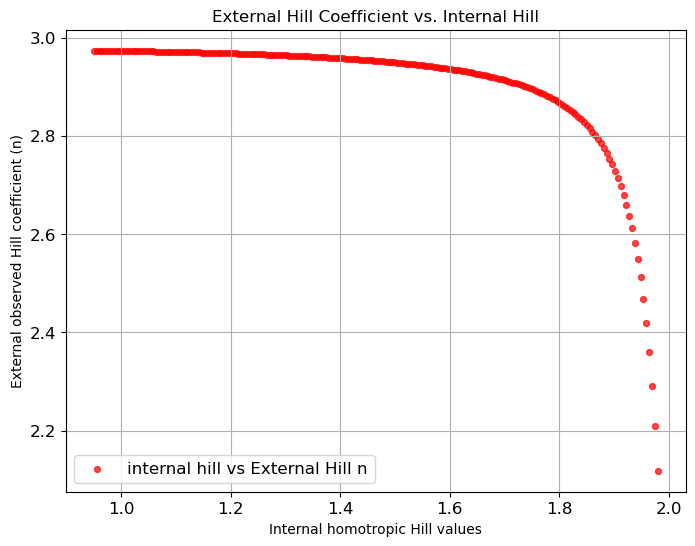

In [7]:

plt.figure(figsize=(8, 6))
plt.scatter(n_vals, hill_coeffs, color='r', alpha=0.7, s=18, label='internal hill vs External Hill n')

# Adding labels and title
plt.xlabel('Internal homotropic Hill values')
plt.ylabel('External observed Hill coefficient (n)')
plt.title('External Hill Coefficient vs. Internal Hill')

# Grid on
plt.grid(True)

# Add legend and manually position it under the title
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)
# Display the plot
plt.show()